# Mission Launches Data Analysis

This notebook performs exploratory data analysis and preprocessing on mission launches data to prepare it for machine learning classification.

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Successfully installed")

## Load and Explore the Dataset

Load the mission launches dataset and perform initial exploration to understand its structure, data types, and identify missing values.

In [193]:
df = pd.read_csv("mission_launches.csv")

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Remove Unnecessary Columns

The first two columns appear to be ID columns that don't provide meaningful information for analysis. We'll remove them to simplify our dataset.

In [194]:
df.drop(df.columns[[0, 1]], inplace=True, axis=1)
print("Last 5 rows after dropping ID columns:")
print(df.tail())
df.info()

Last 5 rows after dropping ID columns:
     Organisation                                   Location  \
4319      US Navy   LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA   LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy   LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date                      Detail  Rocket_Status  \
4319  Wed Feb 05, 1958 07:33 UTC   Vanguard | Vanguard TV3BU  StatusRetired   
4320  Sat Feb 01, 1958 03:48 UTC         Juno I | Explorer 1  StatusRetired   
4321  Fri Dec 06, 1957 16:44 UTC     Vanguard | Vanguard TV3  StatusRetired   
4322  Sun Nov 03, 1957 02:30 UTC  Sputnik 8K71PS | Sputnik-2  StatusRetired   
4323  Fri Oct 04, 1957 19:28 UTC  Sputnik 8K71PS | Sputnik-1  StatusRetired   

     Price Mission_Status  
4319   NaN        Failure  
4320   NaN        Success  
4321   NaN       

## Handle Missing Values and Check for Outliers

This section performs several important data quality checks:
- **Convert Price to numeric**: Ensure the Price column is in the correct data type
- **Calculate skewness**: Identify distribution characteristics of numerical columns
- **Fill missing values**: Use median for skewed data (skewness > 0.5) and mean for normally distributed data
- **Detect outliers**: Use boxplots and the IQR (Interquartile Range) method to identify outliers

In [195]:
# Convert Price column to numeric
df['Price'] = pd.to_numeric(df['Price'], errors="coerce")

# Check missing values before dropping
print("Missing values in Price column (before dropping):")
print("-" * 50)
missing_count = df['Price'].isna().sum()
print(f"Price: {missing_count} missing values ({missing_count/len(df)*100:.2f}%)")
print(f"Total rows before dropping NA: {len(df)}")

# Drop rows with missing Price values
df = df.dropna(subset=['Price'])
print(f"Total rows after dropping NA: {len(df)}")
print(f"Rows removed: {missing_count}")

# Calculate skewness after dropping NA values
print("\nSkewness of Price column (after dropping NA):")
print("-" * 50)
skewness = df['Price'].skew()
print(f"Price: {skewness:.3f}")

# Verify no missing values remain
print(f"\nMissing values after dropping: {df['Price'].isna().sum()}")

Missing values in Price column (before dropping):
--------------------------------------------------
Price: 3375 missing values (78.05%)
Total rows before dropping NA: 4324
Total rows after dropping NA: 949
Rows removed: 3375

Skewness of Price column (after dropping NA):
--------------------------------------------------
Price: 1.508

Missing values after dropping: 0


### Outlier Detection and Removal

BEFORE OUTLIER REMOVAL
Total records: 949
Price statistics:
  Min: 5.30
  Max: 450.00
  Mean: 129.80
  Median: 62.00


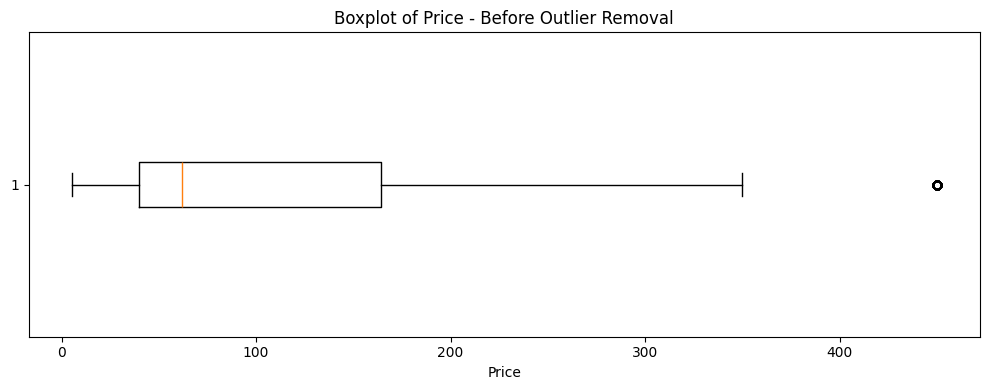


IQR OUTLIER DETECTION
Q1: 40.00, Q3: 164.00, IQR: 124.00
Outlier bounds: [-146.00, 350.00]
Outliers found: 136
Records remaining: 813

Total outliers removed across all iterations: 0
Records remaining: 813

Final data quality check:
Missing values in Price: 0
Price range: [5.30, 350.00]
Price mean: 76.23, median: 50.00
Updated skewness: 1.820

AFTER OUTLIER REMOVAL


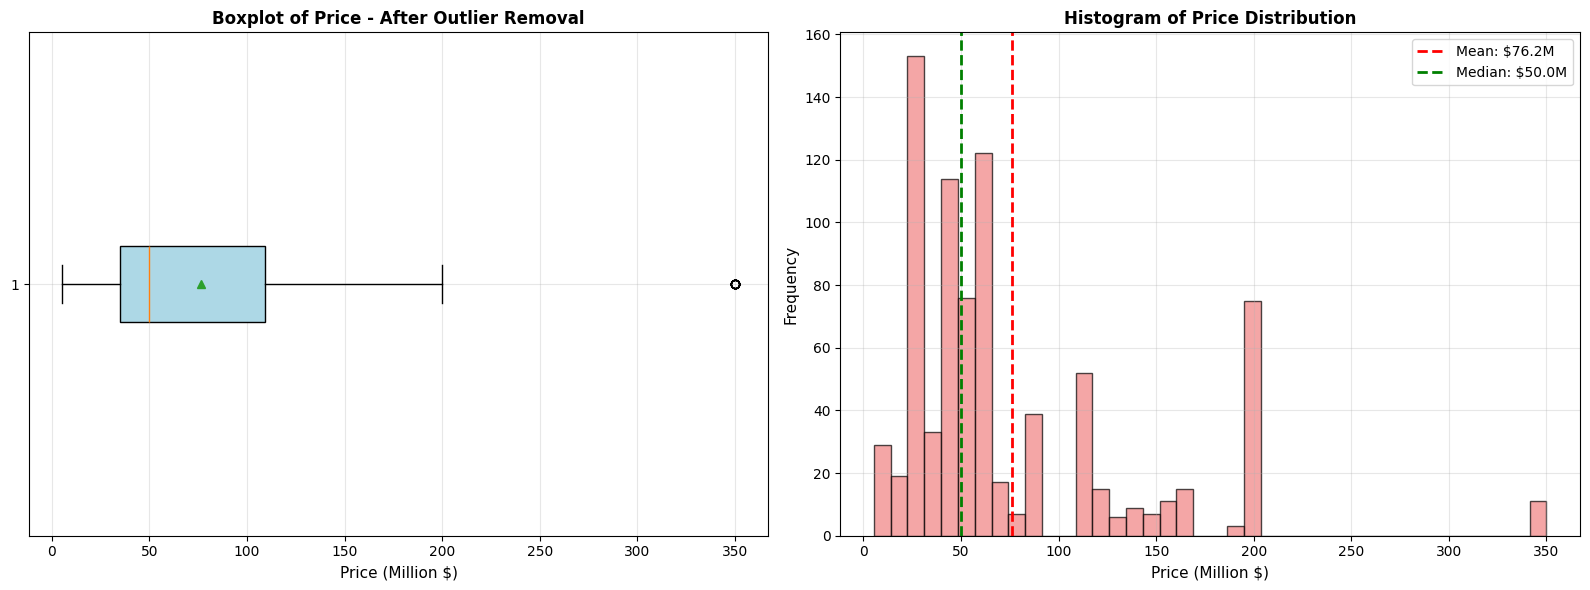


Note: The dots you see on the boxplot are NOT outliers anymore.
They represent legitimate data points that are beyond 1.5*IQR but still valid.
All statistical outliers (beyond the bounds) have been removed.


In [ ]:
# Visualize before outlier removal
print("="*60)
print("BEFORE OUTLIER REMOVAL")
print("="*60)
print(f"Total records: {len(df)}")
print(f"Price statistics:")
print(f"  Min: {df['Price'].min():.2f}")
print(f"  Max: {df['Price'].max():.2f}")
print(f"  Mean: {df['Price'].mean():.2f}")
print(f"  Median: {df['Price'].median():.2f}")

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.boxplot(df['Price'].dropna(), vert=False)
ax.set_title('Boxplot of Price - Before Outlier Removal')
ax.set_xlabel('Price')
plt.tight_layout()
plt.show()

# IQR Method for Outlier Detection and Removal
print("\n" + "="*60)
print("IQR OUTLIER DETECTION")
print("="*60)

total_removed = 0

# Replace the while loop with this:
# Calculate Q1, Q3, and IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Outlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Remove outliers (single pass)
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print(f"Outliers found: {len(outliers)}")

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
print(f"Records remaining: {len(df)}")
print(f"\nTotal outliers removed across all iterations: {total_removed}")
print(f"Records remaining: {len(df)}")

# Verify final data quality
print(f"\nFinal data quality check:")
print(f"Missing values in Price: {df['Price'].isna().sum()}")
print(f"Price range: [{df['Price'].min():.2f}, {df['Price'].max():.2f}]")
print(f"Price mean: {df['Price'].mean():.2f}, median: {df['Price'].median():.2f}")
print(f"Updated skewness: {df['Price'].skew():.3f}")

# Visualize after outlier removal
print("\n" + "="*60)
print("AFTER OUTLIER REMOVAL")
print("="*60)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot - should have no outlier dots now
bp = axes[0].boxplot(df['Price'], vert=False, patch_artist=True, showmeans=True)
bp['boxes'][0].set_facecolor('lightblue')
axes[0].set_title('Boxplot of Price - After Outlier Removal', fontsize=12, weight='bold')
axes[0].set_xlabel('Price (Million $)', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Histogram for better distribution view
axes[1].hist(df['Price'], bins=40, edgecolor='black', alpha=0.7, color='lightcoral')
axes[1].axvline(df['Price'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: ${df["Price"].mean():.1f}M')
axes[1].axvline(df['Price'].median(), color='green', linestyle='--', linewidth=2, 
                label=f'Median: ${df["Price"].median():.1f}M')
axes[1].set_title('Histogram of Price Distribution', fontsize=12, weight='bold')
axes[1].set_xlabel('Price (Million $)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## Feature Engineering

### Encode Categorical Variables

Convert categorical variables into numerical format for machine learning:
- **Rocket_Status**: StatusActive → 1, Other → 0
- **Mission_Status**: Success → 1, Failure → 0


In [197]:
# Clean and encode Rocket_Status
df["Rocket_Status"] = df["Rocket_Status"].astype(str).str.strip()
df["Rocket_Status"] = np.where(df["Rocket_Status"] == "StatusActive", 1, 0)

# Clean and encode Mission_Status
df["Mission_Status"] = df["Mission_Status"].astype(str).str.strip()
df["Mission_Status"] = np.where(df["Mission_Status"] == "Success", 1, 0)


print("\nEncoded Rocket_Status values:")
print(f"\nDistribution: {df['Mission_Status'].value_counts().to_dict()}")
print("\nEncoded Mission_Status values:")
print(f"\nDistribution: {df['Mission_Status'].value_counts().to_dict()}")
df.info()




Encoded Rocket_Status values:

Distribution: {1: 762, 0: 51}

Encoded Mission_Status values:

Distribution: {1: 762, 0: 51}
<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 4020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    813 non-null    object 
 1   Location        813 non-null    object 
 2   Date            813 non-null    object 
 3   Detail          813 non-null    object 
 4   Rocket_Status   813 non-null    int64  
 5   Price           813 non-null    float64
 6   Mission_Status  813 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 50.8+ KB


### Extract Location and Temporal Features

Create additional features from existing columns:
- **Country**: Extract country from Location
- **Year**: Extract year from Date
- **Month_Name**: Extract month name from Date


In [198]:
df['Country'] = df['Location'].str.split(',').str[-1].str.strip()

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract temporal features
df['Year'] = df['Date'].dt.year
df['Month_Name'] = df['Date'].dt.month_name()

print("New features created:")
print(f"Unique countries: {df['Country'].unique()}")

print(df.head())

New features created:
Unique countries: ['USA' 'China' 'Kazakhstan' 'Japan' 'New Zealand' 'Russia' 'France'
 'India' 'Yellow Sea' 'Pacific Missile Range Facility' 'Gran Canaria']
  Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
5         CASC       LC-9, Taiyuan Satellite Launch Center, China   

                       Date  \
0 2020-08-07 05:12:00+00:00   
1 2020-08-06 04:01:00+00:00   
3 2020-07-30 21:25:00+00:00   
4 2020-07-30 11:50:00+00:00   
5 2020-07-25 03:13:00+00:00   

                                              Detail  Rocket_Status   Price  \
0       Falcon 9 Block 5 | Starlink V1 L9 & BlackSky              1   50.00   
1                Long March 2D | Gaofen-9 04 & Q-SAT         

### Handle Missing Temporal Data

Check and remove rows with missing temporal features (Date, Year, Month_Name), as these values are related and necessary for analysis.

In [199]:
print("="*60)
print("HANDLING MISSING TEMPORAL DATA")
print("="*60)

# Check for missing values in temporal columns
print("\nMissing values in temporal features:")
print(f"  Date: {df['Date'].isna().sum()}")
print(f"  Year: {df['Year'].isna().sum()}")
print(f"  Month_Name: {df['Month_Name'].isna().sum()}")

print(f"\nRows before cleaning: {len(df)}")

# Drop rows with missing temporal data
df_before = len(df)
df = df.dropna(subset=['Date', 'Year', 'Month_Name'])
df_after = len(df)

# Verify no missing values remain
missing_after = df.isna().sum()

print(f"\nFinal dataset shape: {df.shape}")


HANDLING MISSING TEMPORAL DATA

Missing values in temporal features:
  Date: 6
  Year: 6
  Month_Name: 6

Rows before cleaning: 813

Final dataset shape: (807, 10)


In [200]:
# 1. Success Rate by Country
print("="*60)
print("SUCCESS RATE BY COUNTRY")
print("="*60)
country_stats = df.groupby('Country').agg({
    'Mission_Status': ['sum', 'count', 'mean']
}).round(3)
country_stats.columns = ['Successful_Missions', 'Total_Missions', 'Success_Rate']
country_stats = country_stats.sort_values('Total_Missions', ascending=False)
print(country_stats)

# 2. Success Rate by Organization
print("\n" + "="*60)
print("TOP 10 ORGANIZATIONS BY LAUNCH COUNT")
print("="*60)
org_stats = df.groupby('Organisation').agg({
    'Mission_Status': ['sum', 'count', 'mean']
}).round(3)
org_stats.columns = ['Successful_Missions', 'Total_Missions', 'Success_Rate']
org_stats = org_stats.sort_values('Total_Missions', ascending=False).head(10)
print(org_stats)

# 3. Success Rate by Month
print("\n" + "="*60)
print("SUCCESS RATE BY MONTH")
print("="*60)
month_stats = df.groupby('Month_Name').agg({
    'Mission_Status': ['sum', 'count', 'mean']
}).round(3)
month_stats.columns = ['Successful_Missions', 'Total_Launches', 'Success_Rate']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_stats = month_stats.reindex([m for m in month_order if m in month_stats.index])
print(month_stats)

# 4. Average Price by Rocket Status
print("\n" + "="*60)
print("AVERAGE PRICE BY ROCKET STATUS")
print("="*60)
price_by_status = df.groupby('Rocket_Status')['Price'].agg(['mean', 'median', 'std', 'count']).round(2)

print(price_by_status)


SUCCESS RATE BY COUNTRY
              Successful_Missions  Total_Missions  Success_Rate
Country                                                        
USA                           314             337         0.932
China                         150             157         0.955
France                         92              95         0.968
India                          58              66         0.879
Russia                         51              54         0.944
Kazakhstan                     39              42         0.929
Japan                          40              40         1.000
New Zealand                    11              13         0.846
Gran Canaria                    2               2         1.000
Yellow Sea                      1               1         1.000

TOP 10 ORGANIZATIONS BY LAUNCH COUNT
              Successful_Missions  Total_Missions  Success_Rate
Organisation                                                   
CASC                          151         

## Statistical Analysis

Perform comprehensive aggregations to understand patterns in the data:
- Mission success rates by country and organization
- Average prices by different categories
- Launch frequency analysis
- Temporal trends


## Data Visualizations

### Price Distribution Analysis

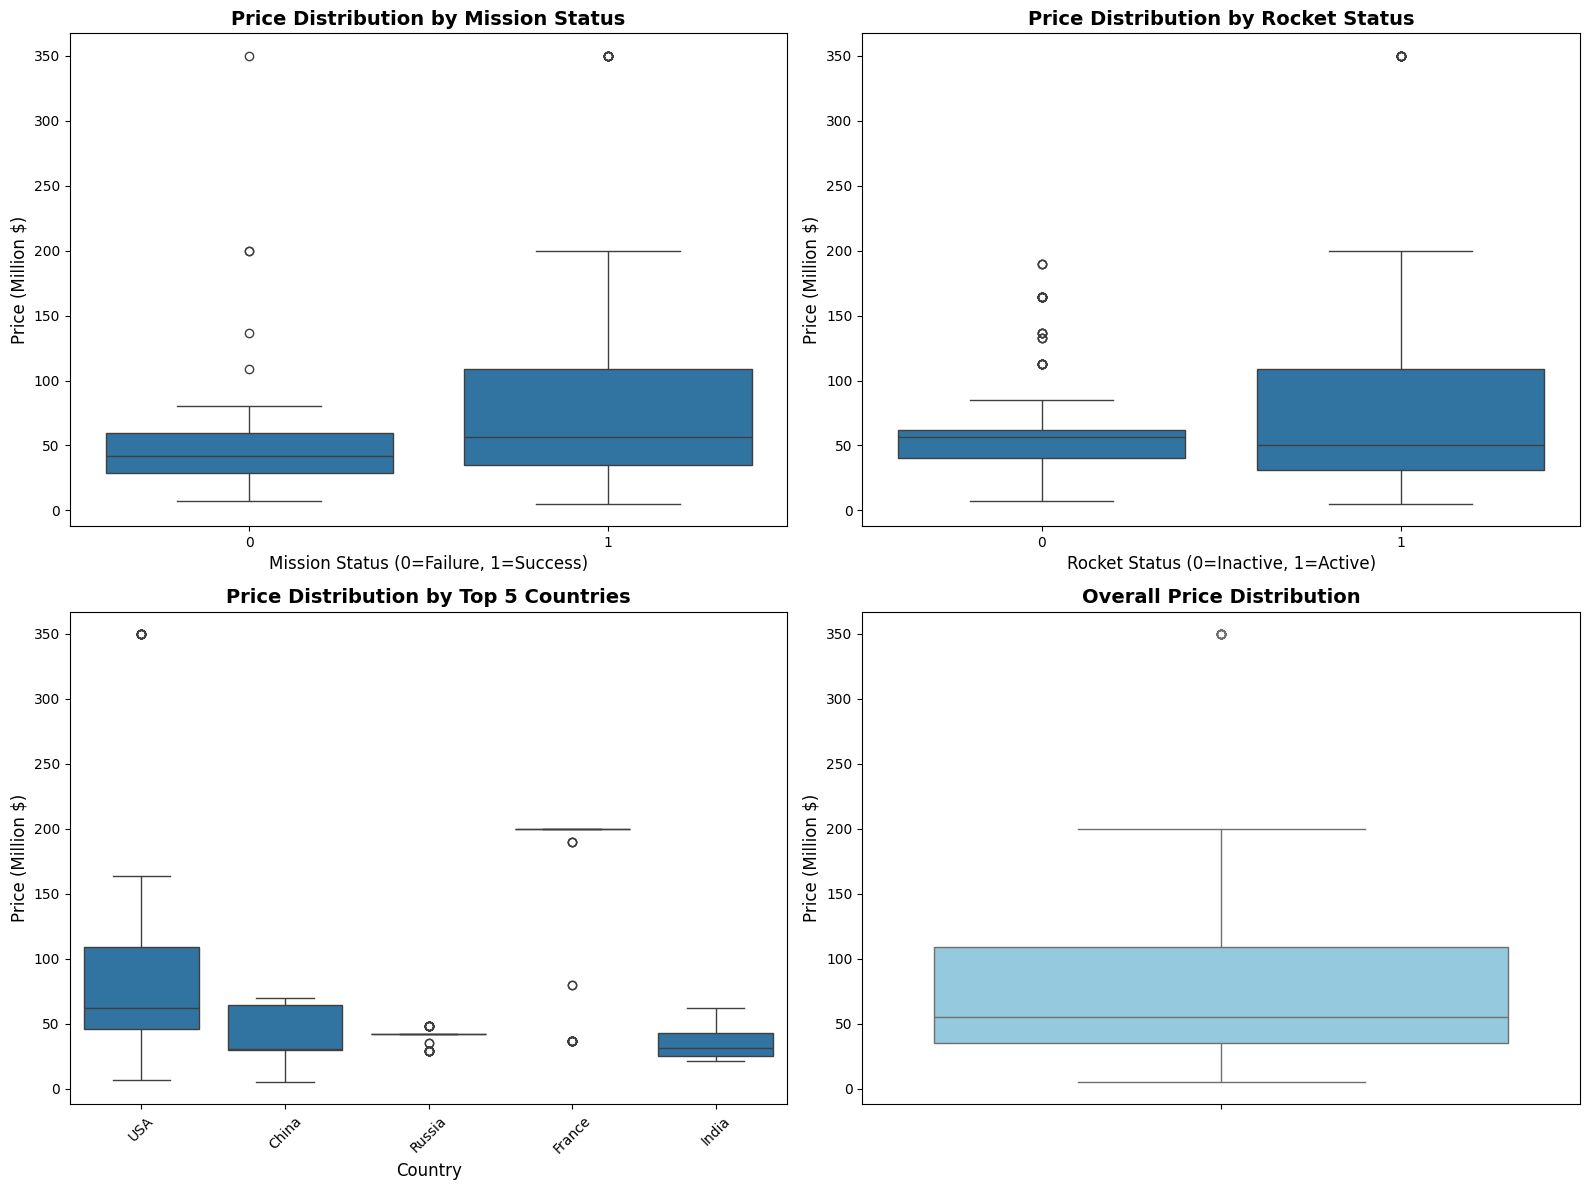

In [201]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Price distribution by Mission Status
sns.boxplot(data=df, x='Mission_Status', y='Price', ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution by Mission Status', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Mission Status (0=Failure, 1=Success)', fontsize=12)
axes[0, 0].set_ylabel('Price (Million $)', fontsize=12)

# Price distribution by Rocket Status
sns.boxplot(data=df, x='Rocket_Status', y='Price', ax=axes[0, 1])
axes[0, 1].set_title('Price Distribution by Rocket Status', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Rocket Status (0=Inactive, 1=Active)', fontsize=12)
axes[0, 1].set_ylabel('Price (Million $)', fontsize=12)

# Price distribution by Top 5 Countries
top_countries = df['Country'].value_counts().head(5).index
df_top_countries = df[df['Country'].isin(top_countries)]
sns.boxplot(data=df_top_countries, x='Country', y='Price', ax=axes[1, 0])
axes[1, 0].set_title('Price Distribution by Top 5 Countries', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Country', fontsize=12)
axes[1, 0].set_ylabel('Price (Million $)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Overall price distribution
sns.boxplot(data=df, y='Price', ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title('Overall Price Distribution', fontsize=14, weight='bold')
axes[1, 1].set_ylabel('Price (Million $)', fontsize=12)

plt.tight_layout()
plt.show()


### Status Distribution - Mission and Rocket Status

### Correlation Analysis

CORRELATION MATRIX
                Rocket_Status  Price  Mission_Status   Year
Rocket_Status           1.000  0.135           0.120  0.323
Price                   0.135  1.000           0.083  0.071
Mission_Status          0.120  0.083           1.000  0.100
Year                    0.323  0.071           0.100  1.000


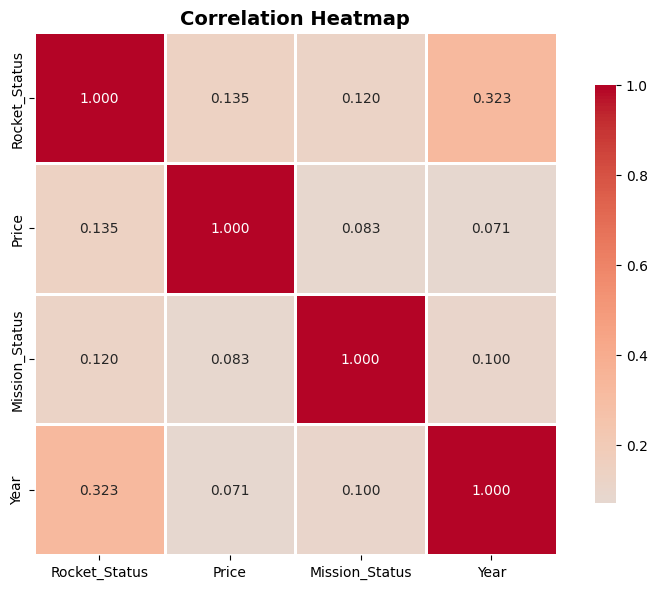

In [202]:
# Calculate correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr().round(3)

print("="*60)
print("CORRELATION MATRIX")
print("="*60)
print(corr_matrix)

# Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Correlation Heatmap', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


### Categorical Analysis - Countries and Organizations

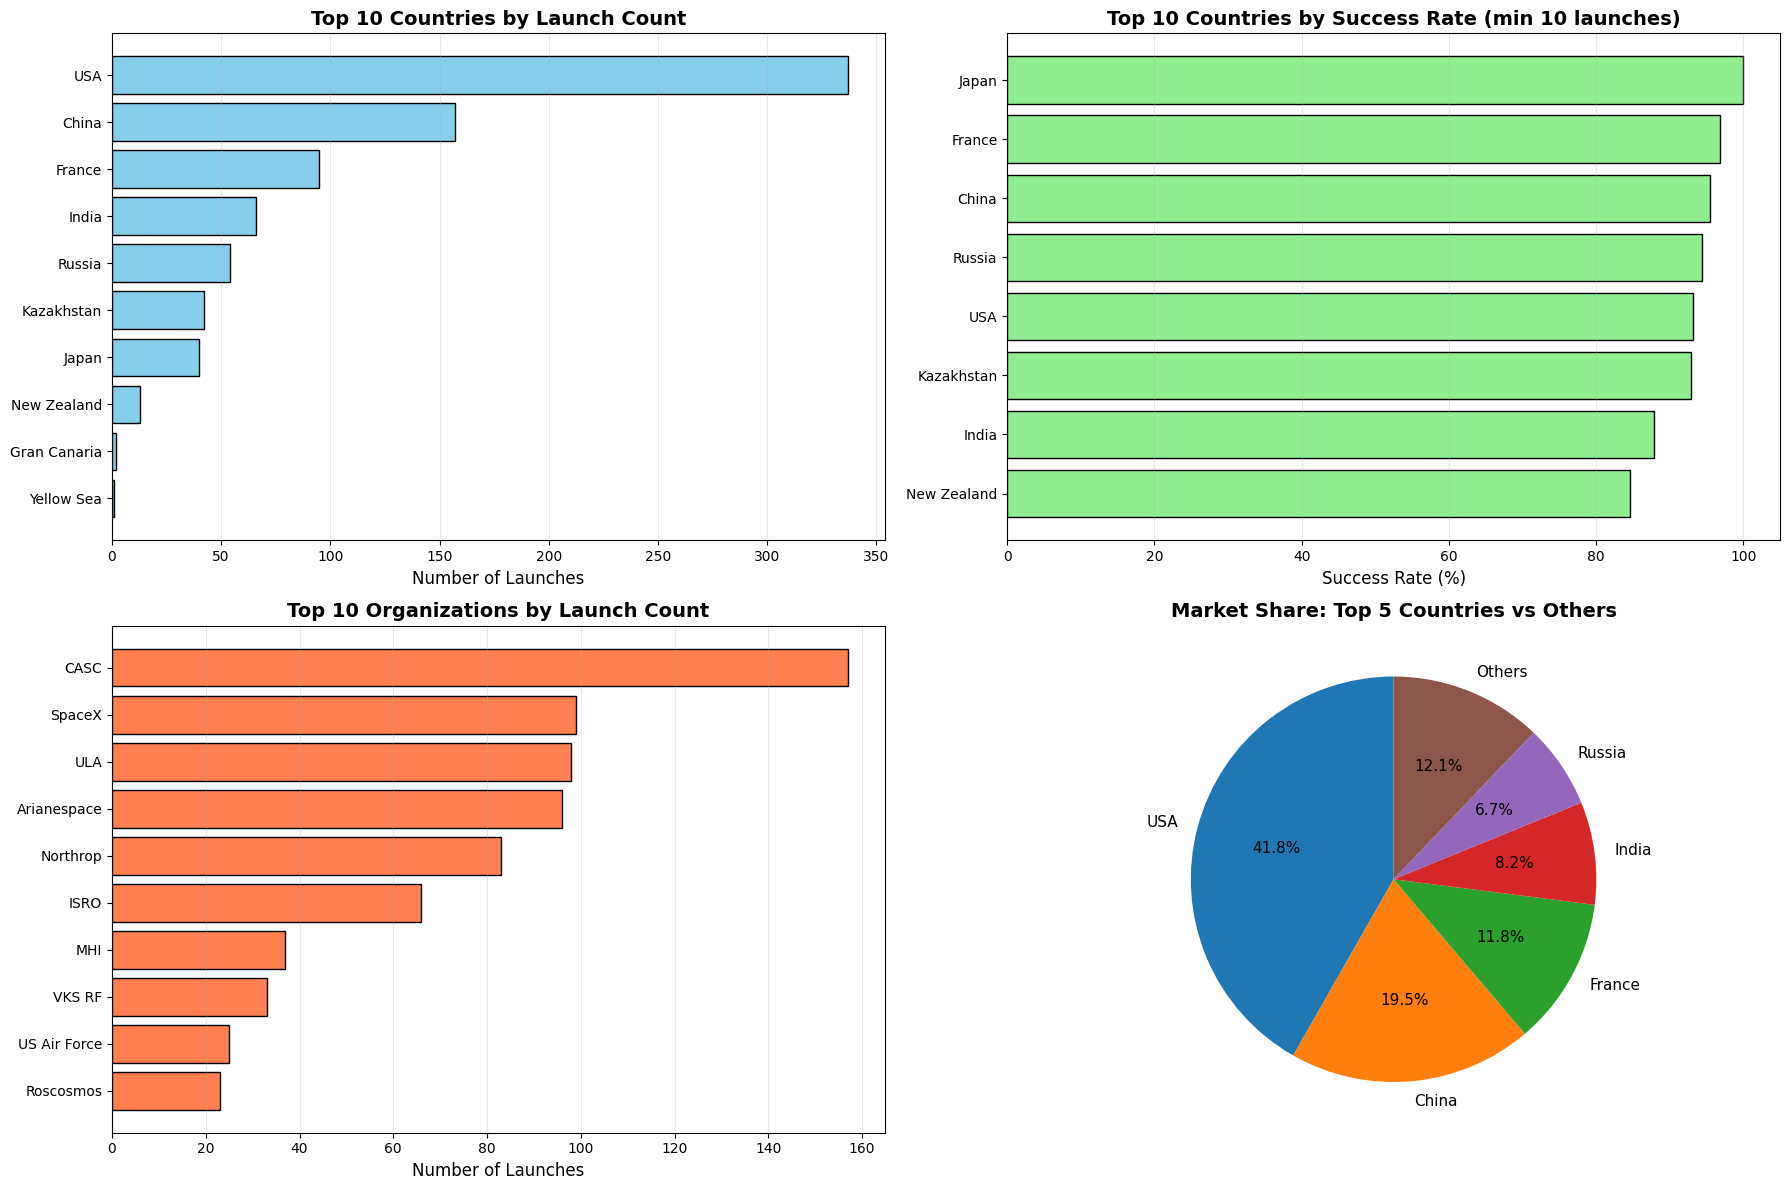

In [203]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Top 10 countries by launch count
top_countries = df['Country'].value_counts().head(10)
axes[0, 0].barh(range(len(top_countries)), top_countries.values, color='skyblue', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_countries)))
axes[0, 0].set_yticklabels(top_countries.index)
axes[0, 0].set_xlabel('Number of Launches', fontsize=12)
axes[0, 0].set_title('Top 10 Countries by Launch Count', fontsize=14, weight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')
axes[0, 0].invert_yaxis()

# Success rate by top 10 countries (minimum 10 launches)
country_success = df.groupby('Country').agg({
    'Mission_Status': 'mean',
    'Country': 'size'
}).rename(columns={'Country': 'count', 'Mission_Status': 'success_rate'})
country_success = country_success[country_success['count'] >= 10].sort_values('success_rate', ascending=False).head(10)
axes[0, 1].barh(range(len(country_success)), country_success['success_rate'] * 100, color='lightgreen', edgecolor='black')
axes[0, 1].set_yticks(range(len(country_success)))
axes[0, 1].set_yticklabels(country_success.index)
axes[0, 1].set_xlabel('Success Rate (%)', fontsize=12)
axes[0, 1].set_title('Top 10 Countries by Success Rate (min 10 launches)', fontsize=14, weight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')
axes[0, 1].invert_yaxis()

# Top 10 organizations by launch count
top_orgs = df['Organisation'].value_counts().head(10)
axes[1, 0].barh(range(len(top_orgs)), top_orgs.values, color='coral', edgecolor='black')
axes[1, 0].set_yticks(range(len(top_orgs)))
axes[1, 0].set_yticklabels(top_orgs.index, fontsize=10)
axes[1, 0].set_xlabel('Number of Launches', fontsize=12)
axes[1, 0].set_title('Top 10 Organizations by Launch Count', fontsize=14, weight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')
axes[1, 0].invert_yaxis()

# Market share: Top 5 countries vs Others
top_5_countries = df['Country'].value_counts().head(5)
other_count = len(df) - top_5_countries.sum()
pie_data = list(top_5_countries.values) + [other_count]
pie_labels = list(top_5_countries.index) + ['Others']
axes[1, 1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, 
               textprops={'fontsize': 11})
axes[1, 1].set_title('Market Share: Top 5 Countries vs Others', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


### Temporal Analysis - Trends Over Time

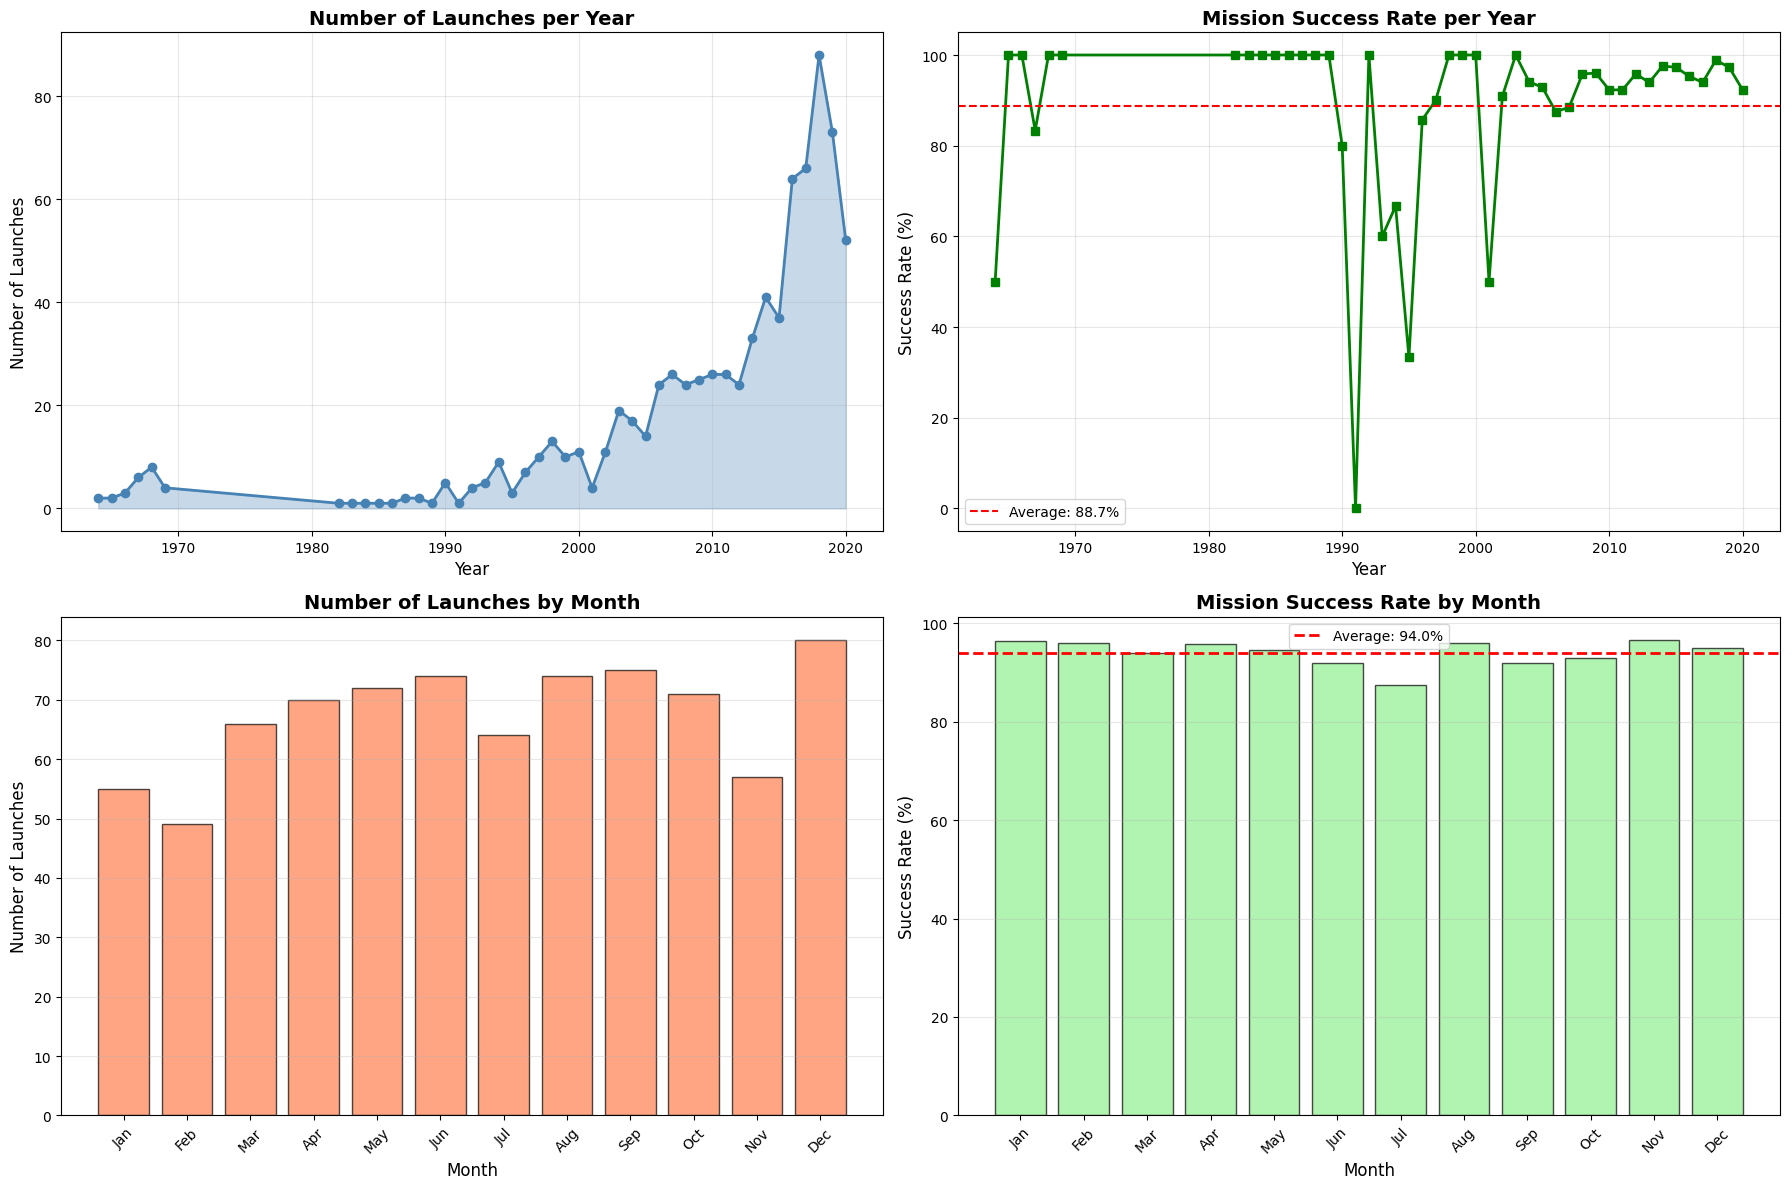


TEMPORAL INSIGHTS
Month with most launches: December (80 launches)
Month with least launches: February (49 launches)
Month with highest success rate: November (96.49%)
Month with lowest success rate: July (87.50%)


In [204]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Launches per year
yearly_data = df.groupby('Year').size()
axes[0, 0].plot(yearly_data.index, yearly_data.values, marker='o', linewidth=2, markersize=6, color='steelblue')
axes[0, 0].fill_between(yearly_data.index, yearly_data.values, alpha=0.3, color='steelblue')
axes[0, 0].set_title('Number of Launches per Year', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Number of Launches', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Success rate over years
yearly_success = df.groupby('Year')['Mission_Status'].mean() * 100
axes[0, 1].plot(yearly_success.index, yearly_success.values, marker='s', linewidth=2, markersize=6, color='green')
axes[0, 1].axhline(y=yearly_success.mean(), color='red', linestyle='--', label=f'Average: {yearly_success.mean():.1f}%')
axes[0, 1].set_title('Mission Success Rate per Year', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Success Rate (%)', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Launches by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = df['Month_Name'].value_counts().reindex(month_order)
axes[1, 0].bar(range(12), monthly_data.values, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_xticks(range(12))
axes[1, 0].set_xticklabels([m[:3] for m in month_order], rotation=45)
axes[1, 0].set_title('Number of Launches by Month', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Month', fontsize=12)
axes[1, 0].set_ylabel('Number of Launches', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Success rate by month
monthly_success = df.groupby('Month_Name')['Mission_Status'].mean().reindex(month_order) * 100
axes[1, 1].bar(range(12), monthly_success.values, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 1].axhline(y=monthly_success.mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Average: {monthly_success.mean():.1f}%')
axes[1, 1].set_xticks(range(12))
axes[1, 1].set_xticklabels([m[:3] for m in month_order], rotation=45)
axes[1, 1].set_title('Mission Success Rate by Month', fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Month', fontsize=12)
axes[1, 1].set_ylabel('Success Rate (%)', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print temporal insights
print("\n" + "="*60)
print("TEMPORAL INSIGHTS")
print("="*60)
print(f"Month with most launches: {monthly_data.idxmax()} ({monthly_data.max()} launches)")
print(f"Month with least launches: {monthly_data.idxmin()} ({monthly_data.min()} launches)")
print(f"Month with highest success rate: {monthly_success.idxmax()} ({monthly_success.max():.2f}%)")
print(f"Month with lowest success rate: {monthly_success.idxmin()} ({monthly_success.min():.2f}%)")


### Distribution Shape Analysis - Skewness

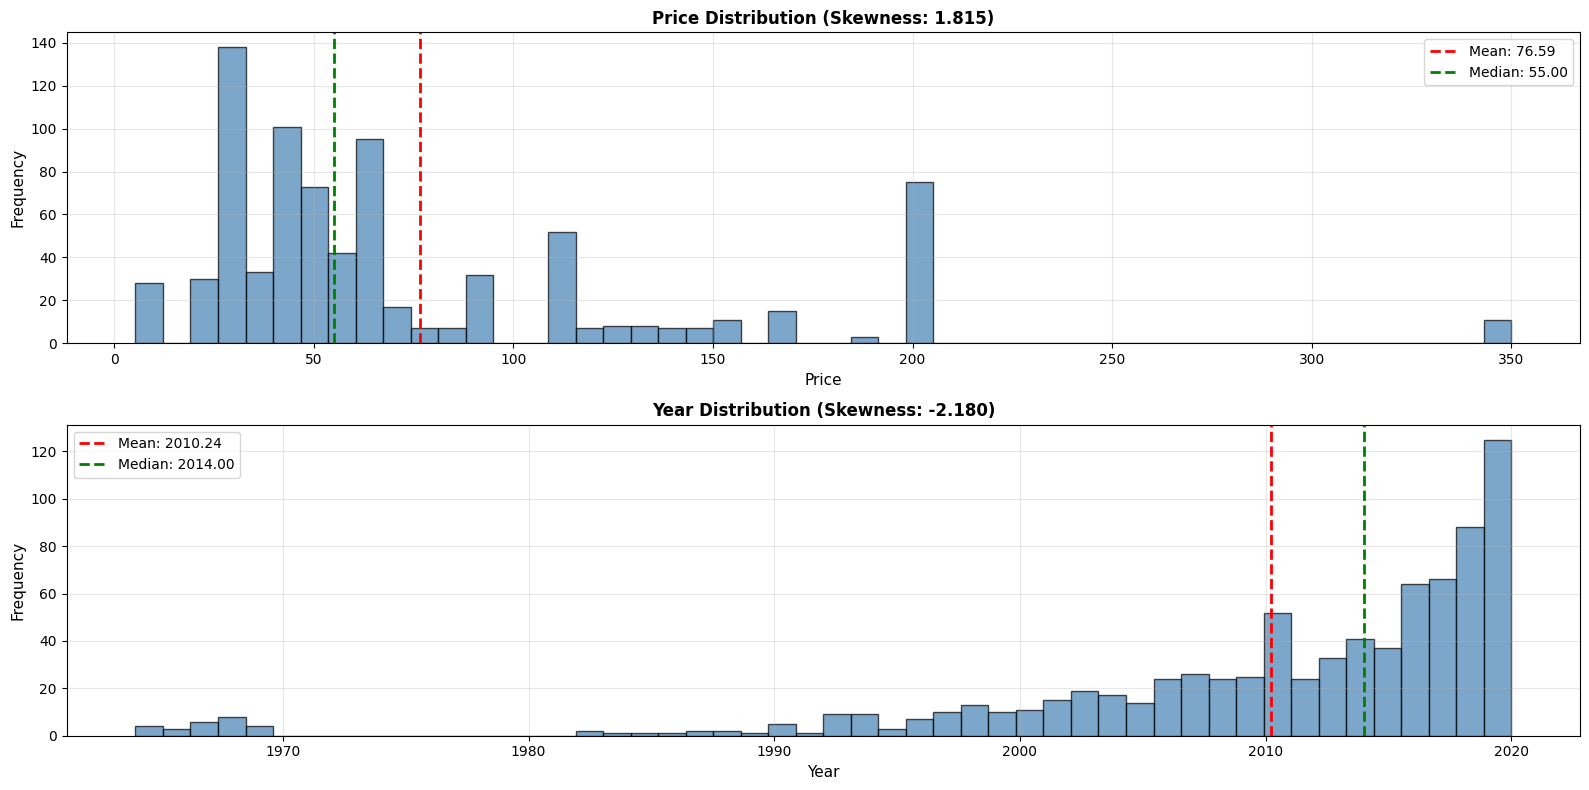


SKEWNESS SUMMARY
Price               :   1.815 - Highly skewed
Year                :  -2.180 - Highly skewed


In [205]:
# Analyze distribution shape for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop(['Mission_Status', 'Rocket_Status'])
n_cols = len(numerical_cols)

fig, axes = plt.subplots(n_cols, 1, figsize=(16, 4 * n_cols))
if n_cols == 1:
    axes = [axes]

for idx, col in enumerate(numerical_cols):
    # Histogram with mean and median lines
    axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, 
                      label=f'Mean: {df[col].mean():.2f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, 
                      label=f'Median: {df[col].median():.2f}')
    
    skewness = df[col].skew()
    axes[idx].set_title(f'{col} Distribution (Skewness: {skewness:.3f})', fontsize=12, weight='bold')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print skewness summary
print("\n" + "="*60)
print("SKEWNESS SUMMARY")
print("="*60)
for col in numerical_cols:
    skewness = df[col].skew()
    if abs(skewness) < 0.5:
        interpretation = "Fairly symmetrical"
    elif abs(skewness) < 1:
        interpretation = "Moderately skewed"
    else:
        interpretation = "Highly skewed"
    print(f"{col:20s}: {skewness:7.3f} - {interpretation}")


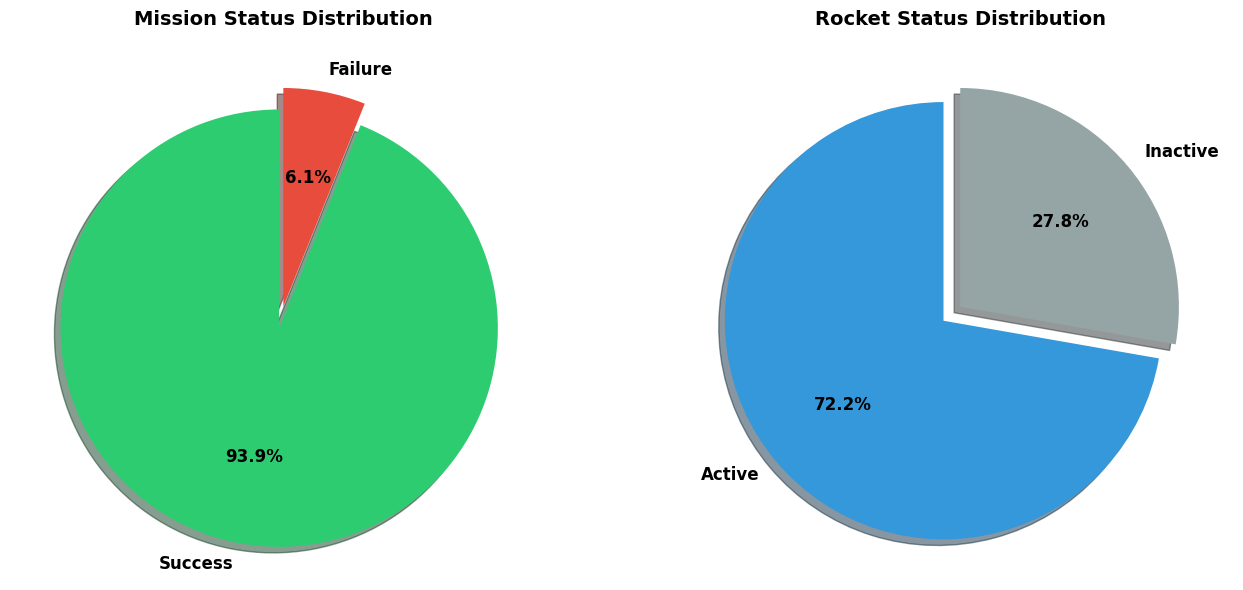


Mission Success Rate: 93.93%
Rocket Active Rate: 72.24%


In [206]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Mission Status distribution
mission_counts = df['Mission_Status'].value_counts()
colors_mission = ['#2ecc71', '#e74c3c']  # Green for success, red for failure
explode_mission = (0.1, 0)  # Explode the success slice
axes[0].pie(mission_counts, labels=['Success', 'Failure'], autopct='%1.1f%%', 
            startangle=90, colors=colors_mission, explode=explode_mission,
            shadow=True, textprops={'fontsize': 12, 'weight': 'bold'})
axes[0].set_title('Mission Status Distribution', fontsize=14, weight='bold')

# Rocket Status distribution
rocket_counts = df['Rocket_Status'].value_counts()
colors_rocket = ['#3498db', '#95a5a6']  # Blue for active, gray for inactive
explode_rocket = (0.1, 0)  # Explode the active slice
axes[1].pie(rocket_counts, labels=['Active', 'Inactive'], autopct='%1.1f%%', 
            startangle=90, colors=colors_rocket, explode=explode_rocket,
            shadow=True, textprops={'fontsize': 12, 'weight': 'bold'})
axes[1].set_title('Rocket Status Distribution', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

print(f"\nMission Success Rate: {mission_counts[1]/len(df)*100:.2f}%")
print(f"Rocket Active Rate: {rocket_counts[1]/len(df)*100:.2f}%")


In [207]:
# Display final dataset information
print("="*60)
print("FINAL DATASET SUMMARY")
print("="*60)
print(f"\nTotal rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumns: {list(df.columns)}")
print("\n" + "-"*60)


df.info()
df.describe()

FINAL DATASET SUMMARY

Total rows: 807
Total columns: 10

Columns: ['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status', 'Country', 'Year', 'Month_Name']

------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 807 entries, 0 to 4020
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    807 non-null    object             
 1   Location        807 non-null    object             
 2   Date            807 non-null    datetime64[ns, UTC]
 3   Detail          807 non-null    object             
 4   Rocket_Status   807 non-null    int64              
 5   Price           807 non-null    float64            
 6   Mission_Status  807 non-null    int64              
 7   Country         807 non-null    object             
 8   Year            807 non-null    float64            
 9   Month_Name    

,Rocket_Status,Price,Mission_Status,Year
count,807.000000,807.000000,807.000000,807.000000
mean,0.722429,76.589071,0.939281,2010.236679
std,0.448078,62.544312,0.238962,10.862312
min,0.000000,5.300000,0.000000,1964.000000
25%,0.000000,35.000000,1.000000,2006.500000
50%,1.000000,55.000000,1.000000,2014.000000
75%,1.000000,109.000000,1.000000,2018.000000
max,1.000000,350.000000,1.000000,2020.000000


## Final Preprocessing & Model Training

### Preprocessing Steps
- **One-Hot Encoding**: Apply one-hot encoding to `Country` and `Organisation` columns
- **Drop Redundant Columns**: Remove `Detail` and `Location` columns
- **Feature Selection**: Prepare final feature set for training

### Class Balancing
- **Check Class Imbalance**: Analyze the distribution of Mission_Status (target variable)
- **Apply SMOTE or Random Oversampling**: Balance the dataset to handle class imbalance
- **Split Data**: Create train/test splits with stratification

### Model Training & Evaluation
Train and compare multiple classification models:
1. **Logistic Regression** - Baseline linear classifier
2. **Random Forest Classifier** - Ensemble tree-based model
3. **Gradient Boosting Classifier** - Advanced boosting algorithm
4. **Support Vector Machine (SVM)** - Kernel-based classifier
5. **K-Nearest Neighbors (KNN)** - Instance-based learning

### Evaluation Metrics
- Accuracy, Precision, Recall, F1-Score
- Confusion Matrix
- ROC-AUC Curve
- Cross-validation scores